In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import joblib

# Define the path to the Excel file
file_path = r"Prediction_Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'


# Read the data from the specified sheet into a pandas DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)


# Display the first few rows of the fetched data
print(df.head())

  Customer_ID  Gender  Age Married            State  Number_of_Referrals  \
0   11340-JAM  Female   21      No  Jammu & Kashmir                    8   
1   11348-MAH  Female   46      No      Maharashtra                   11   
2   11359-AND  Female   28     Yes   Andhra Pradesh                    3   
3   11370-TAM  Female   21      No       Tamil Nadu                   15   
4   11392-JAM  Female   39     Yes  Jammu & Kashmir                   11   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7        NaN           Yes             No  ...   
1                19     Deal 3           Yes             No  ...   
2                 6     Deal 4           Yes             No  ...   
3                10     Deal 4           Yes             No  ...   
4                 1     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      19.950001    219.500000           0.0   
1  B

In [2]:
# Drop columns that won't be used for prediction
df = df.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [3]:
from sklearn.preprocessing import LabelEncoder

# List of columns to be label encoded

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]

# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    df[column] = label_encoders[column].fit_transform(df[column])


In [4]:
# Manually encode the target variable 'Customer_Status'

df['Customer_Status'] = df['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [5]:
# Split data into features and target

x = df.drop('Customer_Status', axis=1)
x

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,0,21,0,7,8,7,5,1,0,0,...,0,1,1,0,19.950001,219.500000,0.0,0,78.599998,298.100006
1,0,46,0,12,11,19,2,1,0,1,...,0,0,0,0,56.049999,1522.650024,0.0,110,1235.079956,2867.729980
2,0,28,1,0,3,6,3,1,0,0,...,0,2,0,1,20.500000,290.549988,0.0,0,435.839996,726.390015
3,0,21,0,17,15,10,3,1,0,1,...,1,1,0,1,59.099998,772.849976,0.0,0,476.140015,1248.989990
4,0,39,1,7,11,1,1,1,0,1,...,1,1,0,0,84.400002,4484.049805,0.0,0,1655.640015,6139.689941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,1,29,0,9,5,20,3,1,0,0,...,0,2,1,1,19.650000,451.549988,0.0,0,43.240002,494.790009
6003,1,28,0,18,15,17,0,1,0,1,...,1,2,0,0,103.150002,6895.500000,0.0,0,888.419983,7783.919922
6004,1,35,1,1,10,24,5,1,0,1,...,1,0,1,0,80.800003,713.099976,0.0,0,183.059998,896.159973
6005,0,50,1,19,3,16,0,1,1,1,...,1,1,1,0,105.199997,7386.049805,0.0,0,3075.330078,10461.379883


In [6]:
y = df['Customer_Status']
y

0       0
1       0
2       0
3       0
4       0
       ..
6002    0
6003    0
6004    1
6005    0
6006    0
Name: Customer_Status, Length: 6007, dtype: int64

In [7]:
# Split data into training and testing datasets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rfc.fit(x_train, y_train)

# Make predictions
y_pred = rfc.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(1202,))

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model

print("Confusion Matrix:",confusion_matrix(y_test, y_pred))


Confusion Matrix: [[809  58]
 [139 196]]


In [10]:
print("Classification Report:",classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.85      0.93      0.89       867
           1       0.77      0.59      0.67       335

    accuracy                           0.84      1202
   macro avg       0.81      0.76      0.78      1202
weighted avg       0.83      0.84      0.83      1202



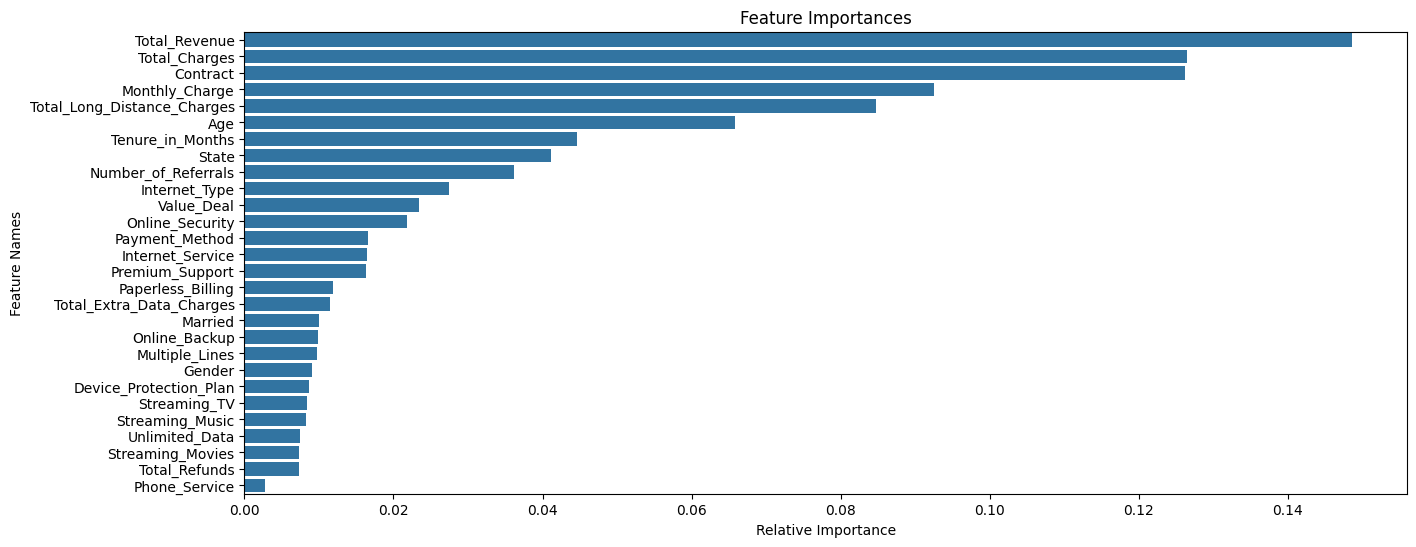

In [11]:
# Feature Selection using Feature Importance

importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1]

# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=x.columns[indices])

plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')

plt.show()

In [12]:
# Define the path to the Joiner Data Excel file
file_path = r"Prediction_Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_JoinData'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

 
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

  Customer_ID  Gender  Age Married    State  Number_of_Referrals  \
0   17796-BIH  Female   65      No    Bihar                    5   
1   18015-ODI  Female   28     Yes   Odisha                   15   
2   26412-ASS  Female   30      No    Assam                    7   
3   26448-BIH  Female   57      No    Bihar                   10   
4   26500-GUJ  Female   62     Yes  Gujarat                    3   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 1        NaN           Yes             No  ...   
1                 9        NaN           Yes             No  ...   
2                18        NaN           Yes             No  ...   
3                21     Deal 5           Yes             No  ...   
4                19     Deal 5           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      48.450001     48.450001           0.0   
1  Bank Withdrawal      49.900002     49.900002     

In [13]:
# Retain the Customer_ID column

customer_ids = new_data['Customer_ID']

In [14]:
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [15]:
# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

In [16]:
# Make predictions

new_predictions = rfc.predict(new_data)


# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions


# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results

original_data.to_csv(r"Predictions.csv", index=False)